## Supervised Learning
### 2.1 Classification 과 Regression
* 분류(Classification)의 특성 : 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것
* 분류의 종류
  * 두개의 클래스로 분류하는 이진 분류(binary classification)
    * 이메일 스팸 분류 - 이 이메일이 스팸인가요?
  * 셋 이상의 클래스로 분류하는 다중 분류(multiclass classification)
    * 붓꽃문제(Iris), 어떤 웹사이트의 글로부터 어떤 언어의 웹사이트의 글인지 예측
* 회귀(Regression)의 특성 : 연속적인 숫자, 부동소수점수(실수)를 예측하는 것
* 회귀의 예시
  * 어떤 사람의 교육수준, 나이, 주거지를 바탕으로 연간 소득을 예측
  * 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등으로 올해 수확량을 예측
* 회귀와 분류의 차이
  * 예상 출력 값 사이에 연속성이 있으면 회귀, 없으면 분류

### 2.2 일반화, 과대적합, 과소적합
* 모델이 처음보는 데이터에 대하여 정확하게 예측할 수 있으면 이를 Train세트에서 Test세트로 **일반화(generalization)** 되었다고 함
* 모델이 Train세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 이를 **과대적합(Overfitting)** 이라고 함
* 너무 간단한 모델이 선택되어서 데이터의 면면과 다양성을 잡아내지 못할 때, 이를 **과소적합(Underfitting)** 이라고 함

### 2.3 지도 학습 알고리즘
#### 2.3.1 예제에 사용할 데이터셋

In [1]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 12.9MB/s ta 0:00:01
  Running setup.py bdist_wheel for mglearn ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/3b/81/34/a54d61d5d108dfcb016bcd8f4f7d8cc0538994f07704714b8d
Successfully built mglearn


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

X.shape: (26, 2)


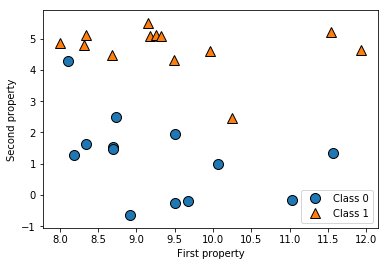

In [3]:
import mglearn
# X, y의 데이터 셋
X, y = mglearn.datasets.make_forge()
# X 모든 row의 1, 2번째 특성을 기준으로 y class의 산포도(흩뿌리듯이) 그림.
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"],loc=4)
plt.xlabel("First property")
plt.ylabel("Second property")
print("X.shape: {}".format(X.shape))

#### 분류의 예시

Text(0,0.5,'Target')

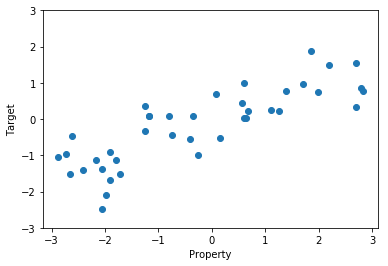

In [4]:
#40개의 X,y의 Sample 추출
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
#y의 범위를 -3~3까지 그래프에 표시
plt.ylim(-3,3)
plt.xlabel("Property")
plt.ylabel("Target")

#### scikit-learn에 들어있는 분류와 회귀 문제 예시
* 이진분류 : 위스콘신 유방암 데이터셋(Wisconsin Breast Cancer)

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


##### 유방암 데이터셋은 569개의 데이터 포인트를 가지고 있고 특성은 30개이다.

In [6]:
print("유방암의 데이터의 형태: {}".format(cancer.data.shape))

유방암의 데이터의 형태: (569, 30)


##### 569개의 데이터 포인트 중 212개는 악성이고 357개는 양성이다.

In [7]:
print("클래스별 샘플 개수:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


##### features_names 속성을 확인하면 각 특성의 의미를 알 수 있다.

In [8]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### scikit-learn에 들어있는 분류와 회귀 문제 예시
* 회귀 : 보스택 주택가격(Boston Housing)

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


#### 2.3.2 K-최근접 이웃
* 가장 간단한 머신러닝 알고리즘으로, 새로운 데이터 포인트에 대해 예측할 땐, 훈련 데이터셋에서 가장 가까운 데이터 포인트(이웃)을 찾는다.

##### K-최근접 이웃 분류
* 가장 가까운 훈련 데이터 포인트 **하나**를 최근접 이웃으로 사용하였을 때

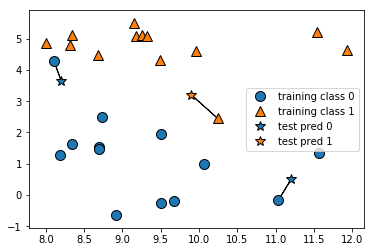

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

* 데이터포인트를 3개를 추가하면서, 가장 가까운 훈련 데이터 포인트 **3개**를 최근접 이웃으로 사용하였을 때

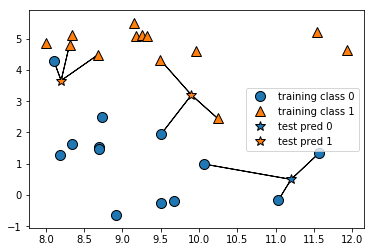

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

* 다중 분류일 때도 각 클래스에 속한 이웃이 몇 개인지를 헤아려 가장 많은 클래스를 예측값으로 사용한다.

##### scikit-learn을 사용한 K-최근접 이웃 알고리즘

In [13]:
from sklearn.model_selection import train_test_split
# X, y 전체 데이터
X, y = mglearn.datasets.make_forge()
# 전체 데이터를 train, test로 쪼갬.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

* KNeighborsClassifier를 import하고 객체를 만든다. 이 때 이웃의 수는 3으로 지정한다.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
# 분류 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

* 테스트 데이터에 대하여 predict 메서드를 호출하여 예측한다.

In [16]:
print("테스트 세트 예측 : {}".format(clf.predict(X_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]


* score 메서드에 테스트 데이터와 테스트 레이블을 넣고 평가한다.

In [17]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


##### KNeighborsClassifier 분석

* 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠하면 **결정경계(decision boundary)** 를 볼 수 있다.

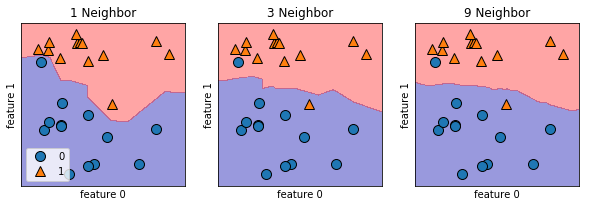

In [18]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    ax.set_title("{} Neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

* 분석결과
  * 이웃의 수를 늘릴 수록 결정 경계는 더 부드러워진다.(단순한 모델이 된다.)

##### 유방암 모델 적용

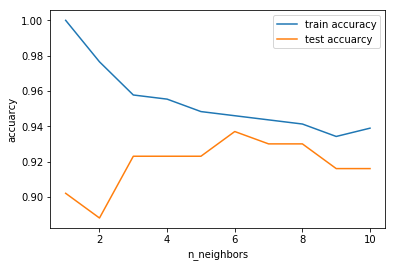

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1~10까지 n_neighbors 적용
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuarcy")
plt.ylabel("accuarcy")
plt.xlabel("n_neighbors")
plt.legend()

* 6일 때 가장 정확도가 높다.
  * 1개일 때는 모델이 너무 복잡해지고, 10개일 때는 모델이 너무 단순해진다.

##### k-최근접 이웃 회귀
* 회귀분석에도 이용가능하다.

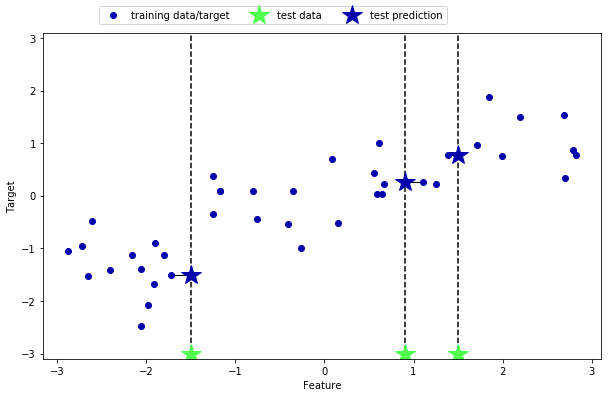

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

* 이웃의 수를 둘 이상 사용하는 것도 가능하다. 단, 여러개의 이웃을 사용할 땐, 이웃 간의 평균이 예측이 된다.

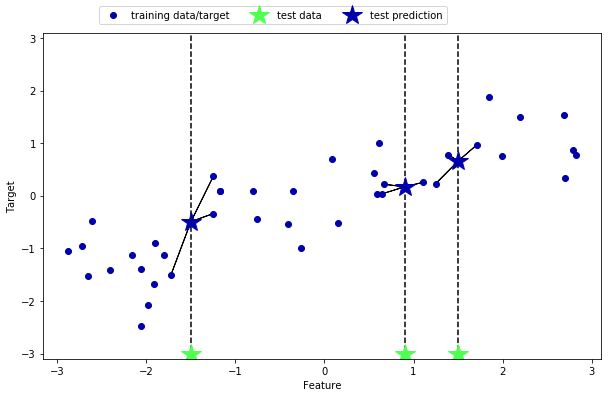

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [23]:
print("테스트 세트 예측\n {}".format(reg.predict(X_test)))

테스트 세트 예측
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [24]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


##### KNeighborsRegressor 분석

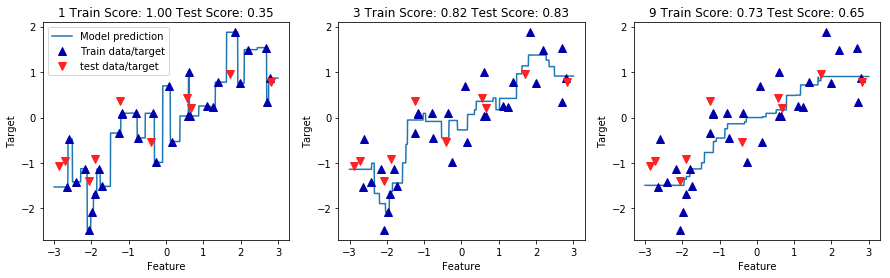

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3,3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} Train Score: {:.2f} Test Score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model prediction", "Train data/target", "test data/target"],loc="best")

* 분석 결과
  * 이웃을 하나만 사용할 때는 예측값이 훈련 데이터 모두를 지나가고, 여러개를 쓰면 쓸 수록 안정된 예측을 얻는다.

##### KNeighbors 분류기의 장단점과 매개변수
* 매개변수 : 거리를 재는 방법과 이웃의 수
  * 이웃의 수는 3개나 5개 정도로 잘 작동하나 잘 조정해야 함.
  * 거리재는 방법은 주로 유클리디안 거리 방식을 사용함.
* 장점
  * 매우 이해하기 쉬운 모델, 자주 좋은 성능 발휘
  * 훈련 세트가 매우 크면(특성의 수나 샘플의 수가 클 경우) 예측이 느려짐
  * 전처리하는 과정이 매우 중요
  * 수백 개 이상의 feature를 가진 데이터 셋에는 잘 작동하지 않음
  * 특성 값 대부분이 0인 데이터셋과는 잘 작동하지 않음
  * **현업에서는 잘 쓰지 않음??????**

#### 2.3.3 선형모델
* 선형모델은 입력 특성에 대한 선형 함수를 만들어 예측하는 것이 특징.

##### 회귀의 선형모델
* y = w[0] * x[0] + ....w[p] * x[p] + b

w[0]: 0.393906  b: -0.031804


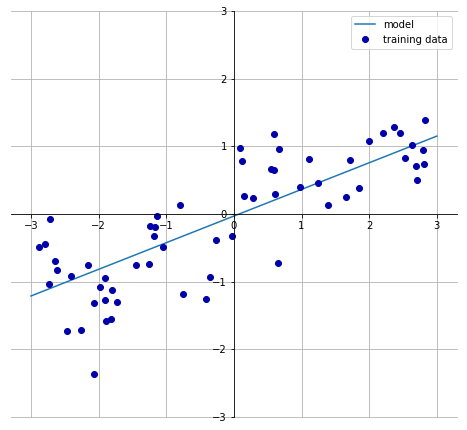

In [26]:
mglearn.plots.plot_linear_regression_wave()

* 회귀에서 선형 모델은 특성이 하나일 땐 직선, 두 개일 때는 평면이 되며, 더 높은 차원에서는 **초평면(hyperplane)**이 된다.

##### 선형 회귀(최소제곱법)
* **선형 회귀(linear regression), 최소제곱법(OLS, ordinary least squares)** 는 가장 간단한 회귀용 선형 알고리즘이다.
* 선형 회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균제곱오차(mean squared error)를 최소화하는 파라미터 w와 b를 찾는다.
* 선형 회귀는 매개변수가 없는 것이 장점이지만, 모델의 복잡도 역시 제어할 수 없다.

In [27]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

* 기울기 파라미터(w)는 가중치 또는 계수라고 하며 lr 객체의 coef_속성에 저장되어있고, 편향 또는 절편(b)은 intercept_에 저장되어 있다.

In [28]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


* scikt-learn에서 밑줄은 사용자 지정 매개변수와 구분하기 위하여 쓰인다.

In [29]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


* 1차원 데이터 세트에서는 모델이 단순하므로 과대적합을 걱정할 필요가 없다. 다음은 보스턴 주택가격 데이터 세트이다.

In [30]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [31]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


* 모델이 과대적합이 되어 이런 문제가 발생한다.

##### 릿지 회귀
* 릿지 회귀에서의 가중치 선택은 가중치의 절댓값을 가능한 한 작게 만든다.(w의 모든 원소가 0에 가까워지도록 한다.)
  * 이는 모든 특성이 출력에 주는 영향을 최소한으로 만든다. == **규제(Regularization)**
* 릿지 회귀에 사용하는 규제 방식을 L2규제라고 한다.

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


* Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어진다.
* 사용자는 alpha 매개변수를 통하여 훈련 세트의 단순화 정도를 정할 수 있다.
  * alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 일반화에 도움을 줄 수 있다.

In [33]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [34]:
ridge10 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


* alpha가 0.1일 때 좋은 성능을 낸다는 것을 알 수 있다.

* alpha 값에 따라 모델의 coef_속성을 보면 모델의 변화를 이해할 수 있다.

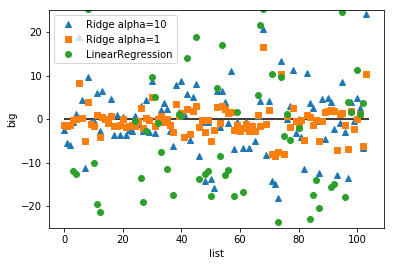

In [35]:
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge.coef_,'s', label="Ridge alpha=1")
#plt.plot(ridge01.coef_,'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("list")
plt.ylabel("big")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

* 다음은 보스택 주택가격 데이터셋 상에서 alpha=1를 적용한 것이다.

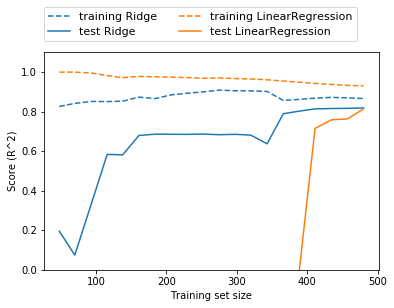

In [36]:
mglearn.plots.plot_ridge_n_samples()

##### 분석 결과
* 릿지와 선형회귀 모두 훈련 세트 점수가 테스트 세트의 점수보다 높다.
  * 릿지는 규제가 적용되므로 훈련 데이터 점수가 전체적으로 선형회귀보다 낮다.
* 테스트 데이터 세트에서는 릿지의 점수가 높다.
* 데이터를 충분히 주면 규제 항은 덜 중요해진다.

##### 라쏘
* 라쏘(Lasso) 역시 계수를 0에 가깝게 하나, 릿지와 다른 점은 어떤 계수는 정말 0이 된다.
  * 특성선택이 자동으로 이루어진다.

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


* Lasso는 훈련 세트와 테스트 세트 모두에서 결과가 좋지 않다.
  * 104개 중 4개의 특성만 사용하였다.

In [38]:
lasso001 = Lasso(alpha = 0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


* alpha를 낮추면 모델의 복잡도가 증가한다.

In [39]:
lasso00001 = Lasso(alpha = 0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 94


Text(0,0.5,'Big')

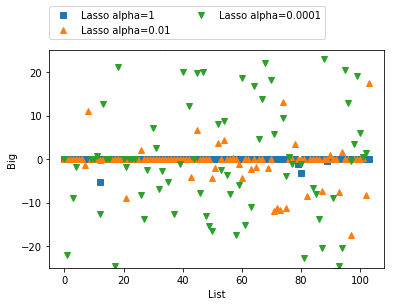

In [40]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

#plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("List")
plt.ylabel("Big")

* 분석 결과
  * 실제 두 모델 중 릿지 회귀를 선호하지만 일부분만 필요하다면 라쏘 선택
  * scikit-learn은 Ridge 패널티를 결합한 Elastic Net도 제공, 이는 L1, L2 두개의 매개변수를 조정해야 한다.

##### 분류형 선형 모델
* 이진 분류(binary classification)에서는 결정 경계가 입력의 선형 함수이다.
  * 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기이다.
* 선형 모델 알고리즘 구분 기준
  * 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
  * 사용할 수 있는 규제가 있는지, 어떤 방식인지
* 크게 알려진 알고리즘은 **로지스틱 회귀와 서포트 벡터 머신**이다.

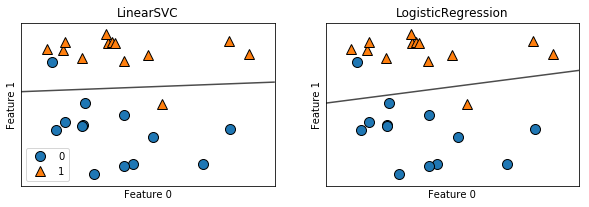

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

* 분석결과
  * 비슷한 결정경계를 만들었고, 둘다 L2 규제를 사용한다.

* 위 두 모델에서 규제의 강도를 결정하는 매개변수는 C이다. C의 값이 높아지면 규제가 감소한다.

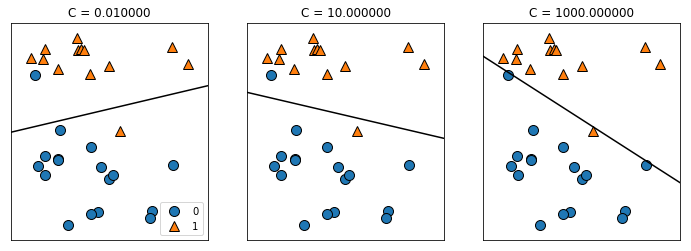

In [42]:
mglearn.plots.plot_linear_svc_regularization()

* 다음은 유방암 데이터 세트를 통해 분석해보자.

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.958


* 95%로 훌륭한 성능이다. 하지만 훈련 세트와 테스트 세트의 성능이 매우 비슷하므로 과소적합이다.

In [44]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


##### 다중 클래스 분류용 선형 모델
* 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 기법은 일대다 방식이다.
* 클래스별 이진 분류기를 만들면 각 클래스가 계수 벡터(w)와 절편(b)를 하나씩 갖게 된다.

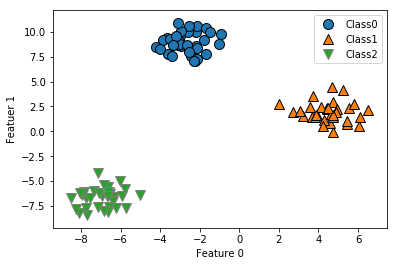

In [45]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Featuer 1")
plt.legend(["Class0", "Class1", "Class2"])

In [46]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


* coef_배열의 크기는 (3,2) 이다. 행은 세 개의 클래스에 각각 대응하는 계수 벡터이며, 열은 각 특성에 따른 계수 값이다.
* intercept_는 각 클래스의 절편을 담은 1차원 벡터이다.

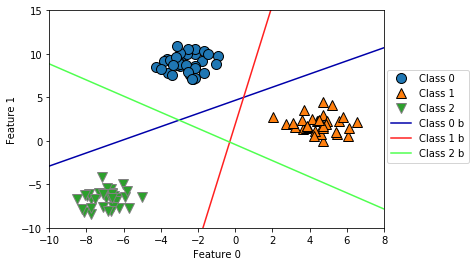

In [47]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", 'Class 1', 'Class 2', "Class 0 b", 'Class 1 b', 'Class 2 b'], loc=(1.01,0.3))

* 그림 중앙의 삼각형 영역은 가장 가까운 직선의 클래스가 된다.

Text(0,0.5,'Feature 1')

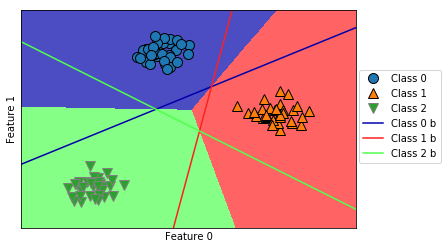

In [48]:
mglearn.plots.plot_2d_classification(linear_svm,X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["Class 0", 'Class 1', 'Class 2', "Class 0 b", 'Class 1 b', 'Class 2 b'], loc=(1.01,0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

* 장단점과 매개변수
  * 매개변수 : 회귀모델에서는 alpha였고, LinearSVC와 LogisticRegression은 C이다.
    * **alpha가 클수록, C가 작을수록 모델이 단순해진다.**
    * 로그 스케일로 최적치를 정한다.
  * 중요한 특성이 많지 않으면 L1, 그렇지 않으면 L2 규제를 사용한다ㅣ.
    * L1은 해당 모델의 중요한 특성이 무엇인지 설명할 때도 쓰인다.
  * 장점 : 학습속도가 빠르고 예측도 빠르다.
    * 수십만에서 수백만개의 샘플로 이루어져 있다면 LogisticRegression과 Ridge에 solver='sag' 옵션을 준다.
    * 다른 대안으로는 SGDClassifier와 SGD Regressor를 사용한다.
  * 샘플에 비해 특성이 많을 때 잘 작동한다.

#### 2.3.4 니아브 베이즈 분류기
* 니아브 베이즈(naive bayes) 분류기는 앞의 두 모델보다 훈련 속도가 빠르지만, 일반화 성능이 조금 뒤진다.
* 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합한다.
* 종류에는 GaussianNB, BernoulliNB, MultinomialNB 3가지가 있다.
  * GaussianNB : 어떤 연속적인 데이터에 적용 가능
  * BernoulliNB : 이진데이터에 적용
  * MultinomialNB : 카운트 데이터(셀 수 있는 데이터)에 적용

* BernoulliNB, MultinomialNB는 대부분 텍스트 데이터를 분류할 때 사용된다.

* BernoulliNB 분류기는 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 센다.

In [49]:
import numpy as np
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])
y = np.array([0,1,0,1])

* 이진 특성을 4개 가진 데이터 포인트가 4개 있고, 클래스는 0과 1, 두개이다.

In [50]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y==label].sum(axis=0)
print("특성 카운트:\n {}".format(counts))

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


##### 장단점과 매개변수
* MultinomialNB와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수를 가지고 있다.
  * alpha가 크면 모델의 복잡도가 낮아진다.(그러나 성능 향상에 크게 기여하지는 않는다.)
* GaussianNB는 매우 고차원적인 데이터셋에 사용하고, 다른 두 니아브 베이즈 모델은 텍스트같은 희소한 데이터를 카운트하는데 쓰인다.

#### 2.3.5 결정트리
* 결정트리(decision tree)는 분류와 회귀 문제에 널리 사용된다.
* 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습한다.

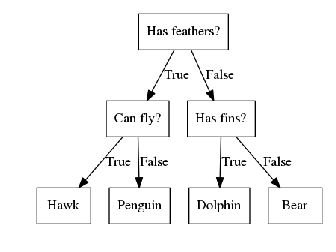

In [51]:
mglearn.plots.plot_animal_tree()

* 트리의 노드는 질문이나 정답을 담은 네모 상자이다.
* edge는 질문의 답과 다음 질문을 연결한다.

##### 결정 트리 만들기
* 결정 트리를 학습한다는 것은 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다는 뜻이다.
  * 머신러닝에서는 이런 질문들을 테스트라고 한다.
* 연속적인 데이터에 적용할 테스트는 "특성 i는 값a보다 큰가?"와 같은 형태를 가진다.
* 트리를 만들 때 알고리즘은 타깃값에 대해 가장 많은 정보를 가진 것을 고른다.
  * 반복된 프로세스는 각 노드가 테스트 하나씩을 가진 이진 결정 트리를 만든다.
* 회귀 문제에도 트리를 사용할 수 있는데, 찾은 리프노드의 훈련 데이터 평균값이 이 데이터 포인트의 출력이 된다.

##### 결정 트리의 복잡도 제어하기
* 일반적으로 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합된다.
  * 순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다는 의미이다.
* 과대적합을 막는 2가지
  * 트리 생성을 일찍 중단하는 전략(사전 가지치기)
    * 트리의 최대 깊이나 리프의 최대 개수를 제한하거나 노드가 불할하기 위한 포인트의 최소 개수 지정
  * 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략

* 유방암 데이터셋을 이용한 사전 가지치기의 효과

In [52]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree  = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


* 일정 깊이에 도달하면 트리의 성장을 멈추게 한다.

In [53]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


##### 결정 트리 분석

In [54]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "약성"], feature_names=cancer.feature_names, impurity=False, filled=True)

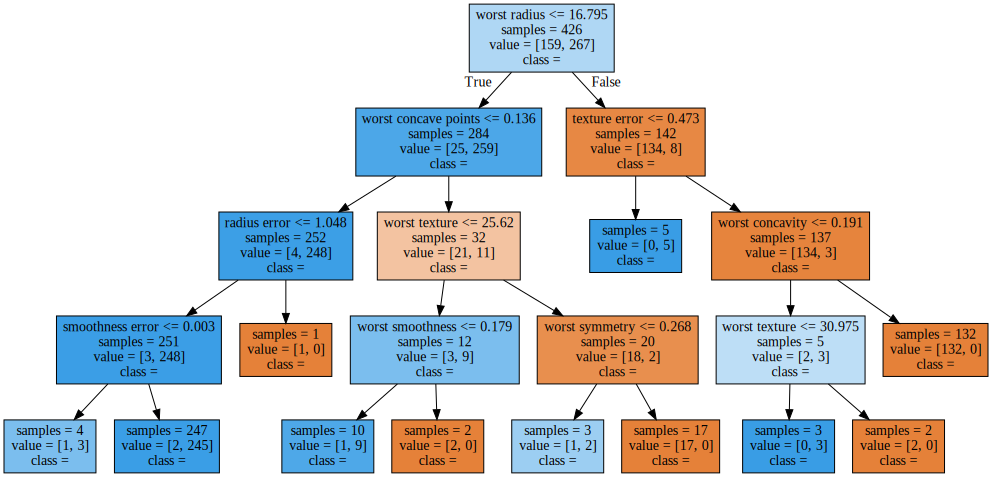

In [55]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

##### 트리의 특성 중요도
* 전체 트리를 살펴보는 것 대신에 트리가 어떻게 작동되는지 요약하는 속성을 사용할 수 있다.
  * 가장 널리 사용되는 속성은 특성 중요도(feature importance)이다.

In [56]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


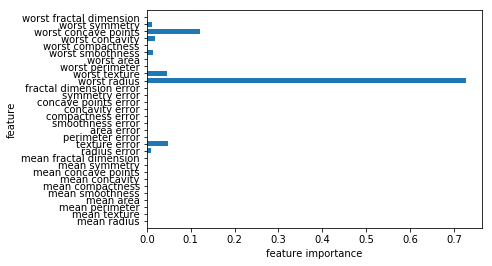

In [57]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1,n_features)
plot_feature_importances_cancer(tree)

* feature_importance_가 낮다고 해서 그 특성이 안 중요한 것은 아니다.

Feature importances: [0. 1.]


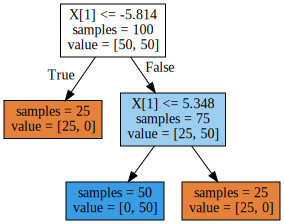

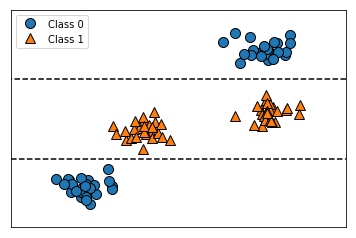

In [58]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

* 회귀에서의 트리기반 모델에서는 훈련 데이터 범위 밖의 포인트에 대해 예측을 할 수 없다.

Text(0,0.5,'가격 ($/Mbyte_')

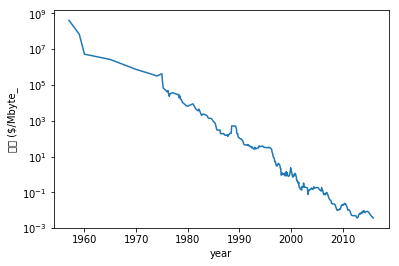

In [59]:
import pandas as pd
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("가격 ($/Mbyte_")

In [60]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]

y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

* 가격을 로그 스케일로 바꾸었기 때문에 비교적 선형적인 관계로 바꾼다.

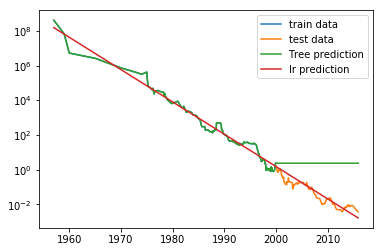

In [61]:
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="lr prediction")
plt.legend()

* 분석 결과
  * 트리모델 : 훈련 데이터를 완벽하게 예측하지만 데이터 범위 밖으로 나가면 예측할 능력이 없다.
  * 선형모델 : 매끈하게 근사한다.

* 장단점과 매개변수
  * 결정 트리에서 모델 복잡도를 조절하는 매개변수는 사전 가지치기 매개변수이다.
    * max_depth, max_leaf_nodes, min_amples_leaf 중 하나만 지정해도 충분하다.
  * 장 점
    * 만들어진 모델을 쉽게 시각화할 수 있다.
    * 데이터 스케일에 구애받지 않는다.
  * 단 점
    * 사전 가지치기를 사용해도 과대적합되는 경향이있다.
       * 앙상블 방법을 대안으로 사용한다.

#### 2.3.6 결정 트리의 앙상블
* **앙상블(Ensemble)** 은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다.
  * **렌덤 포레스트(Random Forest)** 와 **그래디언트 부스팅(Gradient boosting)** 결정 트리가 있다.

##### 렌덤 포레스트
* 결정 트리의 단점 : 훈련 데이터에 과대적합되는 경향이 있다.
* 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균낸다.
* 랜덤 포레스트에서 트리를 랜덤하게 만드는 방법은 2가지이다.
  * 데이터 포인트를 무작위로 선택하는 방법
  * 분할 테스트에서 특성을 무작위로 선택하는 방법

##### 랜덤 포레스트 구축
* 우선 생성할 트리의 개수를 먼저 정한다.
  * 매개변수 : n_estimators
  * 완전히 독립적이어야 하므로 각 트리가 고유하게 만들어지도록 무작위한 선택을 한다.
* 데이터의 부트스트랩 샘플(bootstrap sample)을 생성한다.
* 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아닌 각 노드에서 후보 특성을 무작위로 선택한 후 최선의 테스트를 찾는다.
  * 매개변수 : max_features
    * max_features를 n_feature로 설정하면 특성 선택에 무작위성이 없다.
    * max_features를 크게 하면 랜덤 포레스트 트리들은 비슷하고 가장 두드러진 특성을 통해 데이터에 맞춰진다.
  * 회귀의 경우 이 예측들을 평균하여 최종예측을 만들고, 분류는 약한 투표 전략을 사용한다.

##### 랜덤 포레스트 분석
* two_moon 데이터 셋으로 트리 5개로 구성된 랜덤 포레스트 모델 생성

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

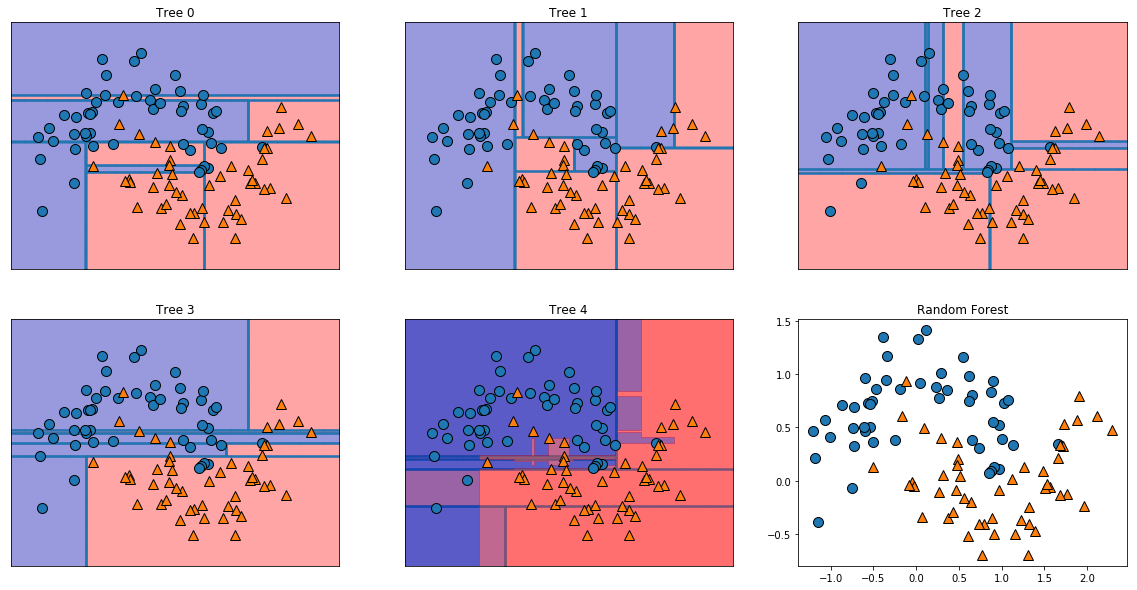

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,1], alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X[:,0], X[:,1],y)

* 분석결과 : 각 트리는 불완전하지만 합치면 안전하다 (덜 과대적합되고 좋은 결정 경계를 만들어준다.)

* 유방암 데이터셋에 100개의 트리로 이뤄진 랜덤 포레스트 적용

In [66]:
X_train, X_test, y_train, y_test =  train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


* 유방암 데이터로 만든 랜덤 포레스트 모델의 특성 중요도

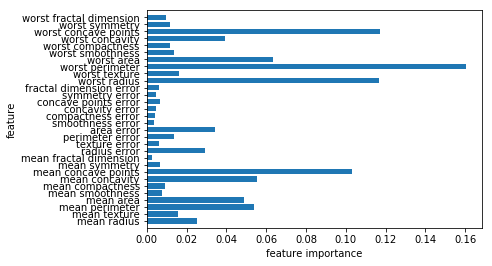

In [67]:
plot_feature_importances_cancer(forest)

* 장단점과 매개변수
  * 장점
    * 가장 널리 사용되는 알고리즘임.
    * 매개변수 튜닝을 하지 않아도 잘 작동함.
    * n_jobs 매개변수를 통하여 사용할 코어 수를 지정할 수 있다.
  * 유의할 점
    * 랜덤 포레스트의 트리가 많을수록 random_state 값의 변화에 따른 변동이 적다.
    * 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다.
    * 큰 데이터 셋에도 잘 작동한다.
    * 훈련과 예측이 느리다.
  * 매개변수
    * n_estimators, max_features, max_depth
    * n_estimators은 클수록 좋다.
    * max_features은 기본값을 써도 괜찮다.

#### 그래디언트 부스팅 회귀 트리
* 회귀와 분류 모두 사용할 수 있다.
* 랜덤 포레스트와 달리 그래디언트 부스팅은 이진 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
  * 무작위성이 없다.
  * 강력한 사전 가지치기가 사용된다.
  * 깊지 않은 트리를 사용한다. -> 메모리를 적게 사용하고 예측도 빠르다.
* 업계에서 많이 사용된다.
* 매개변수 : learning_rate, n_estimators
  * n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커진다.

* 유방암 데이터셋을 이용해 GradientBoostingClassifier를 사용한 예

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [69]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [71]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


* 분석 결과 : 학습률을 낮추는 것은 테스트 세트의 성능을 조금밖에 개선하지 못했지만, 트리의 최대 깊이를 낮추는 것은 모델 성능 향상에 크게 기여하였다.

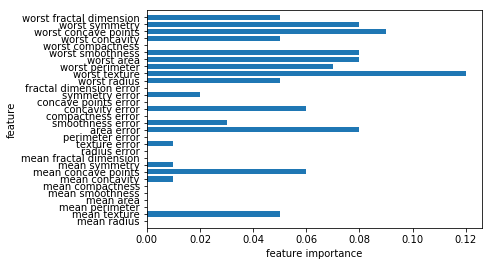

In [73]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

* 장단점과 매개변수
  * 장점
    * 강력하다.
  * 단점
    * 매개변수를 잘 조정해야 하고 훈련 시간이 길다.
    * 고차원 데이터에는 잘 작동하지 않는다.
  * 매개변수
    * n_estimaotrs는 랜덤 포레스트와 달리 n_estimators를 크게 하면 모델이 복잡해지고 과대적합이 될 가능성이 있다.
    * 적절한 learning_rate를 조절할 필요가 있다.
    * max_depth를 매우 작게 설정하며 5보다 깊어지지 않게 한다.